In [1]:
import pandas as pd
from sklearn.svm import SVC, LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

### a.

In [2]:
train_a_df = pd.read_csv("data/svmdata_a.txt", sep='\t')
test_a_df = pd.read_csv("data/svmdata_a_test.txt", sep='\t')

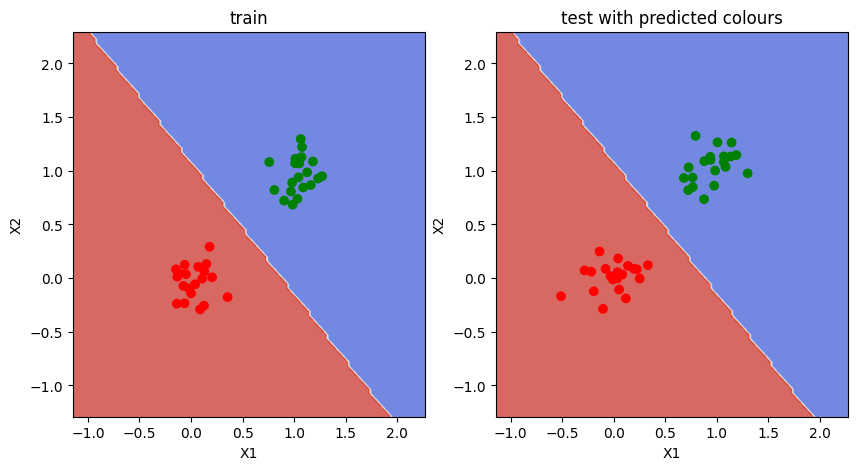

Number of supported vectors for each class: [3 3]


In [3]:
svc = SVC(kernel='linear')
svc.fit(X=train_a_df.loc[:,['X1', 'X2']], y=train_a_df.Colors)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
DecisionBoundaryDisplay.from_estimator(svc, train_a_df.loc[:,['X1', 'X2']], ax=axes[0],response_method="predict", alpha=0.8, cmap=plt.cm.coolwarm)
DecisionBoundaryDisplay.from_estimator(svc, train_a_df.loc[:,['X1', 'X2']], ax=axes[1],response_method="predict", alpha=0.8, cmap=plt.cm.coolwarm)
axes[0].scatter(train_a_df['X1'], train_a_df['X2'], c=train_a_df['Colors'])
axes[1].scatter(test_a_df['X1'], test_a_df['X2'], c=svc.predict(test_a_df.loc[:,['X1', 'X2']]))
axes[0].set_title("train")
axes[1].set_title("test with predicted colours")
plt.show()
print(f'Number of supported vectors for each class: {svc.n_support_}')

Text(0.5, 1.0, 'test')

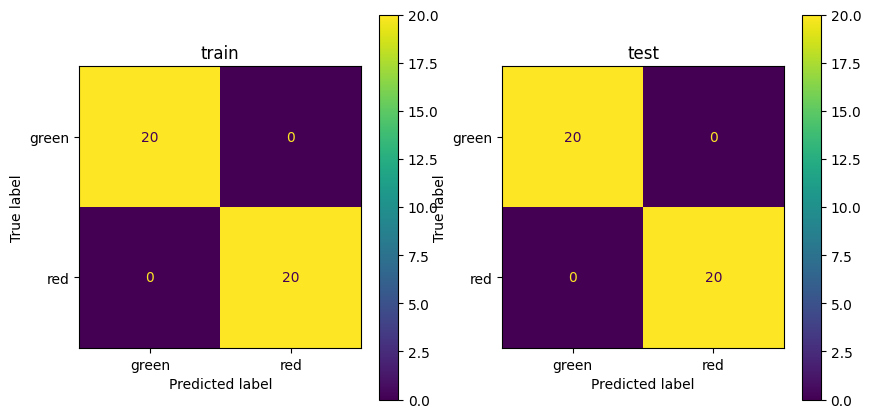

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ConfusionMatrixDisplay(confusion_matrix(y_true=train_a_df.loc[:,['Colors']], y_pred=svc.predict(train_a_df.loc[:,['X1', 'X2']])), display_labels=svc.classes_).plot(ax=axes[0])
ConfusionMatrixDisplay(confusion_matrix(y_true=test_a_df.loc[:,['Colors']], y_pred=svc.predict(test_a_df.loc[:,['X1', 'X2']])), display_labels=svc.classes_).plot(ax=axes[1])
axes[0].set_title("train")
axes[1].set_title("test")

### b.

In [5]:
train_b_df = pd.read_csv("data/svmdata_b.txt", sep='\t')
test_b_df = pd.read_csv("data/svmdata_b_test.txt", sep='\t')

d:\учеба\ml\ml_venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


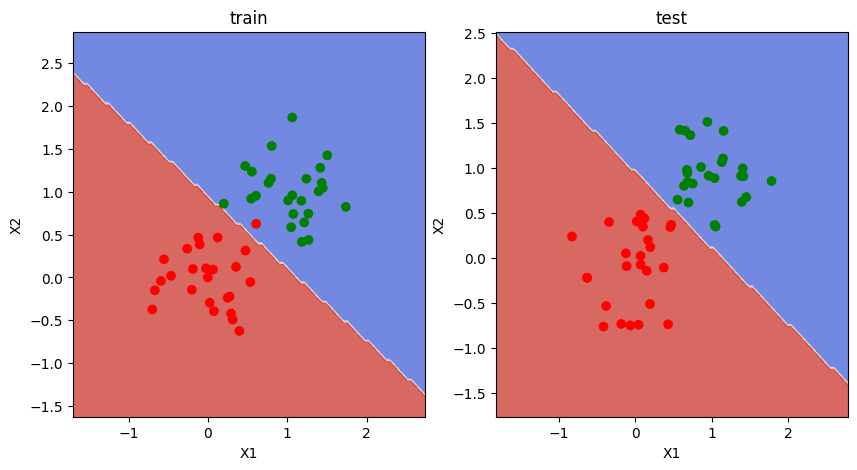

train accuracy: 0.98
test accuracy: 1.0


In [6]:
linear_svc = LinearSVC(random_state=0)
linear_svc.fit(X=train_b_df.loc[:,['X1', 'X2']], y=train_b_df.loc[:,['Colors']])
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
DecisionBoundaryDisplay.from_estimator(linear_svc, train_b_df.loc[:,['X1', 'X2']],response_method="predict", alpha=0.8, cmap=plt.cm.coolwarm, ax=axes[0])
axes[0].scatter(train_b_df['X1'], train_b_df['X2'], c=train_b_df['Colors'])
axes[0].set_title('train')
DecisionBoundaryDisplay.from_estimator(linear_svc, test_b_df.loc[:,['X1', 'X2']],response_method="predict", alpha=0.8, cmap=plt.cm.coolwarm, ax=axes[1])
axes[1].scatter(test_b_df['X1'], test_b_df['X2'], c=test_b_df['Colors'])
axes[1].set_title('test')
plt.show()
print(f"train accuracy: {accuracy_score(train_b_df.Colors, linear_svc.predict(train_b_df.loc[:,['X1', 'X2']]))}")

print(f"test accuracy: {accuracy_score(test_b_df.Colors, linear_svc.predict(test_b_df.loc[:,['X1', 'X2']]))}")

d:\учеба\ml\ml_venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


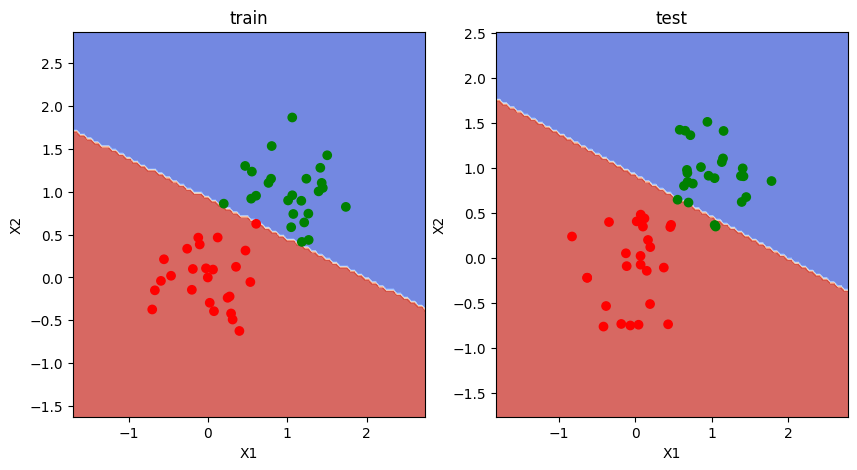

train accuracy: 1.0
test accuracy: 0.94


In [7]:
linear_c_svc = LinearSVC(random_state=0, C=200)
linear_c_svc.fit(X=train_b_df.loc[:,['X1', 'X2']], y=train_b_df.Colors)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
DecisionBoundaryDisplay.from_estimator(linear_c_svc, train_b_df.loc[:,['X1', 'X2']], response_method="predict", alpha=0.8, cmap=plt.cm.coolwarm, ax=axes[0])
axes[0].scatter(train_b_df['X1'], train_b_df['X2'], c=train_b_df.Colors)
axes[0].set_title('train')
DecisionBoundaryDisplay.from_estimator(linear_c_svc, test_b_df.loc[:,['X1', 'X2']],response_method="predict", alpha=0.8, cmap=plt.cm.coolwarm, ax=axes[1])
axes[1].scatter(test_b_df['X1'], test_b_df['X2'], c=test_b_df.Colors)
axes[1].set_title('test')
plt.show()
print(f"train accuracy: {accuracy_score(train_b_df.loc[:,['Colors']], linear_c_svc.predict(train_b_df.loc[:,['X1', 'X2']]))}")
print(f"test accuracy: {accuracy_score(test_b_df.loc[:,['Colors']], linear_c_svc.predict(test_b_df.loc[:,['X1', 'X2']]))}")

### c, d, e

In [8]:
def testSVC(train_file_path: str, test_file_path: str, gamma: str = 'scale'):
    train_df = pd.read_csv(train_file_path, sep='\t')
    test_df = pd.read_csv(test_file_path, sep='\t')
    classifiers = {
    'linear': SVC(kernel='linear'),
    'poly1': SVC(kernel='poly', degree=1, gamma=gamma),
    'poly2': SVC(kernel='poly', degree=2, gamma=gamma),
    'poly3': SVC(kernel='poly', degree=3, gamma=gamma),
    'poly4': SVC(kernel='poly', degree=4, gamma=gamma),
    'poly5': SVC(kernel='poly', degree=5, gamma=gamma),
    'sigmoid': SVC(kernel='sigmoid', gamma=gamma),
    'rbf': SVC(kernel='rbf', gamma=gamma)
    }
    fig, axes = plt.subplots(2, 8, figsize=(25, 5))
    i = 0
    for name, cls in classifiers.items():
        cls.fit(X=train_df.loc[:,['X1', 'X2']], y=train_df.Colors)
        DecisionBoundaryDisplay.from_estimator(cls, train_df.loc[:,['X1', 'X2']], response_method="predict", alpha=0.8, cmap=plt.cm.coolwarm, ax=axes[0][i])
        axes[0][i].scatter(train_df['X1'], train_df['X2'], c=train_df['Colors'])
        axes[0][i].set_title(name)
        DecisionBoundaryDisplay.from_estimator(cls, test_df.loc[:,['X1', 'X2']], response_method="predict", alpha=0.8, cmap=plt.cm.coolwarm, ax=axes[1][i])
        axes[1][i].scatter(test_df['X1'], test_df['X2'], c=test_df['Colors'])
        axes[1][i].set_title(name)
        i = i + 1

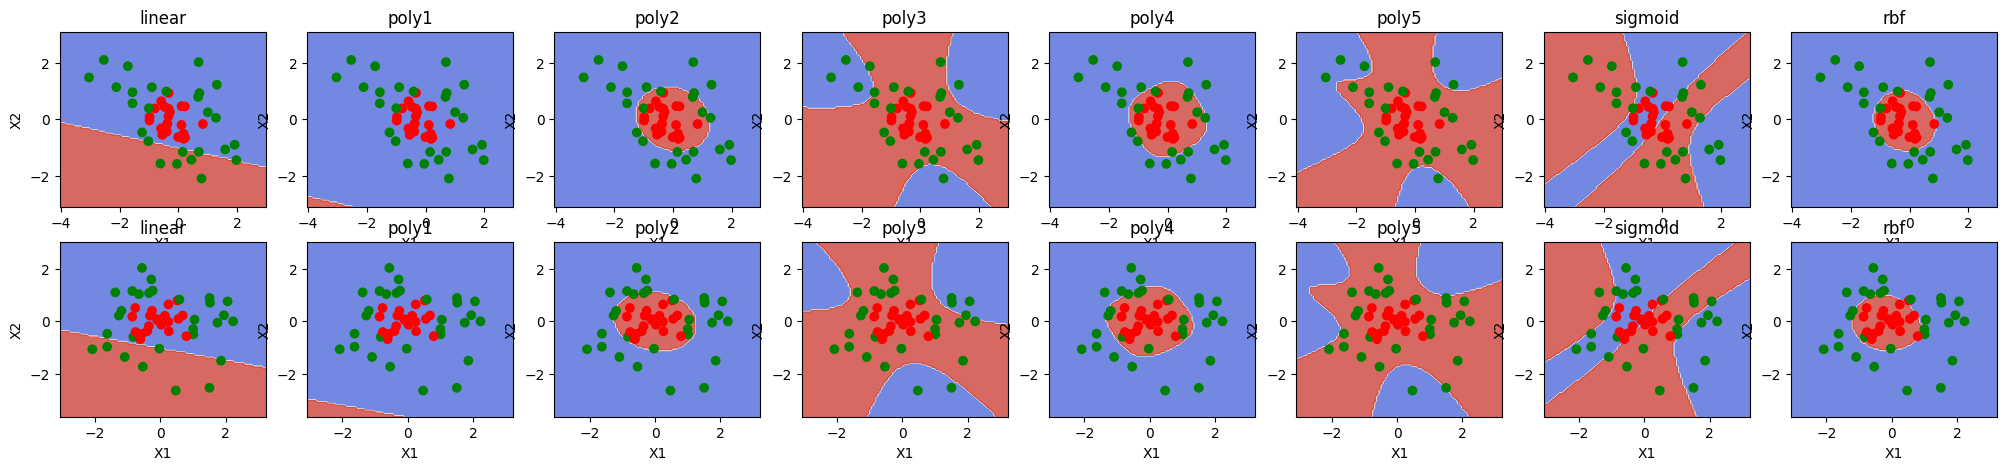

In [9]:
testSVC('data/svmdata_c.txt', 'data/svmdata_c_test.txt')

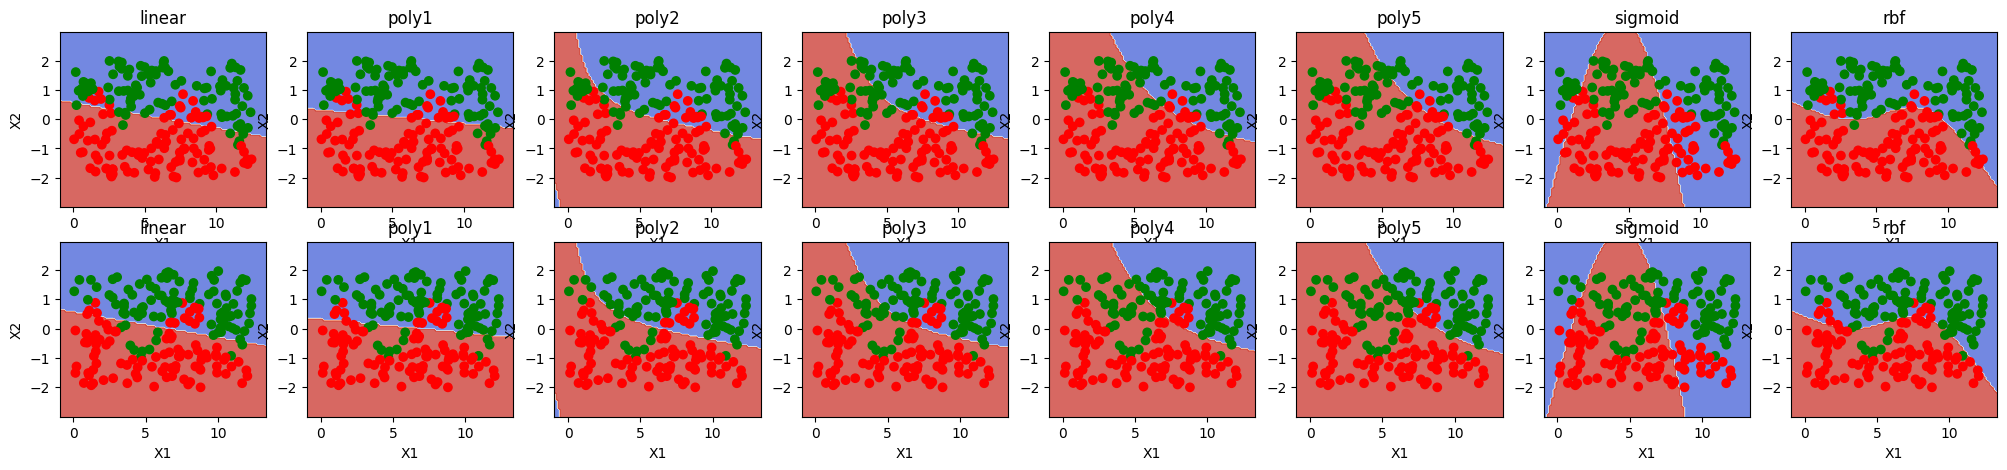

In [10]:
testSVC('data/svmdata_d.txt', 'data/svmdata_d_test.txt')

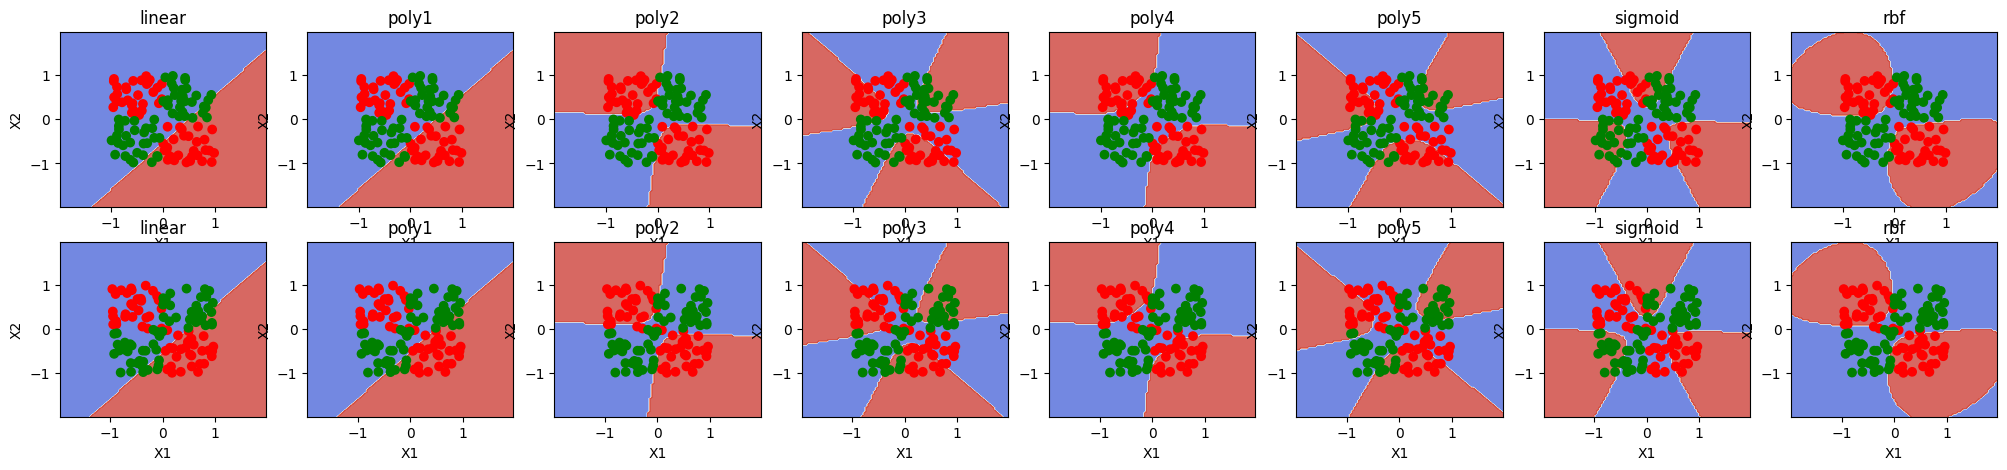

In [11]:
testSVC('data/svmdata_e.txt', 'data/svmdata_e_test.txt')

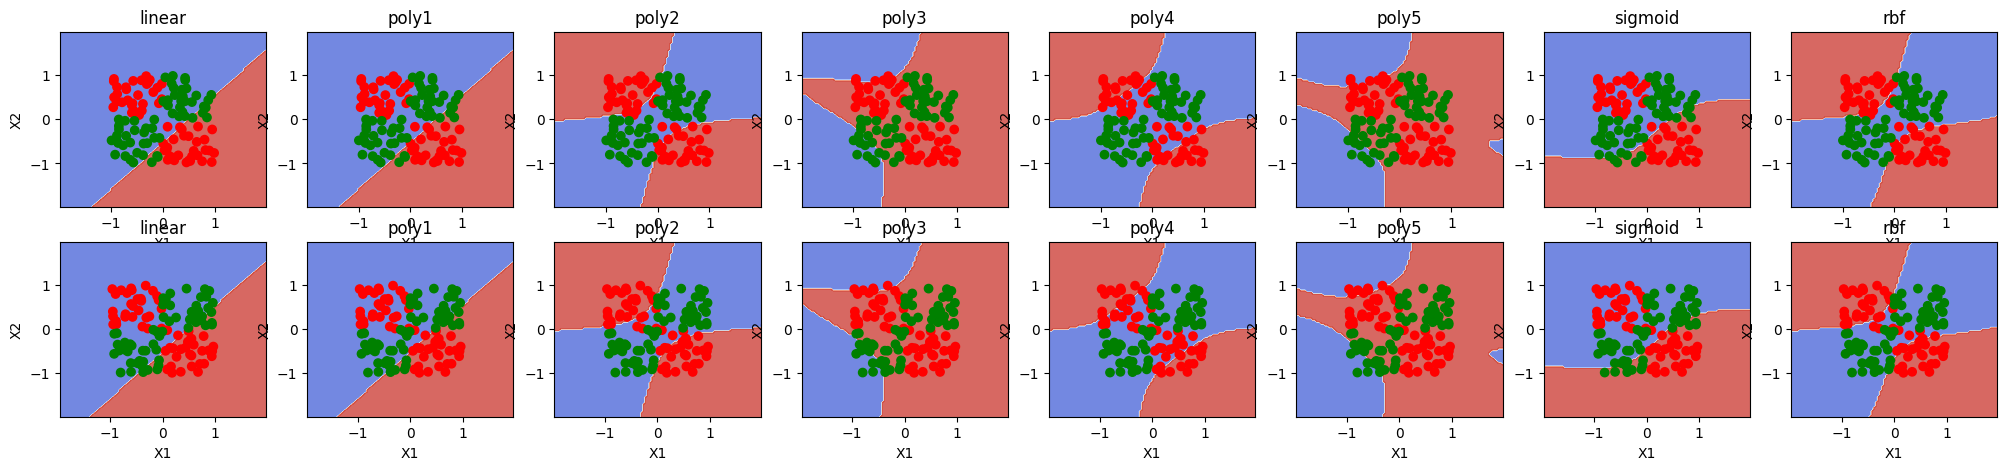

In [12]:
testSVC('data/svmdata_e.txt', 'data/svmdata_e_test.txt', 'auto')

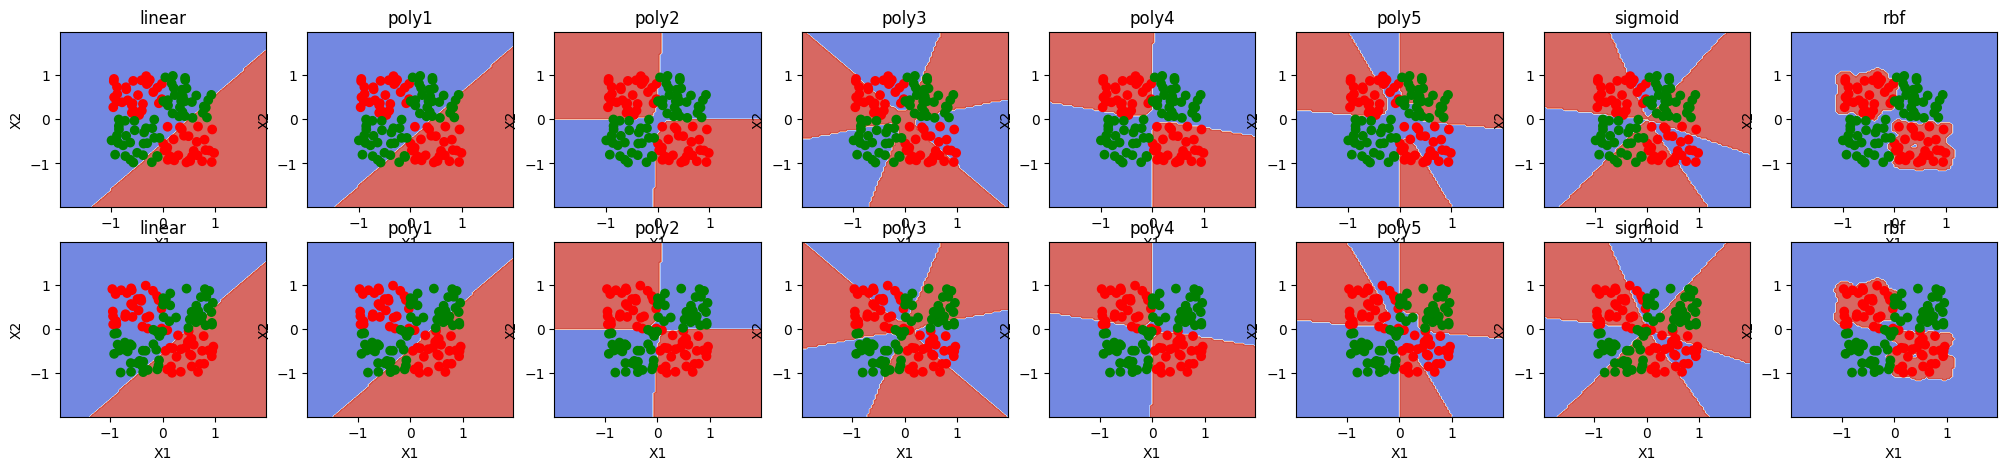

In [13]:
testSVC('data/svmdata_e.txt', 'data/svmdata_e_test.txt', 100)

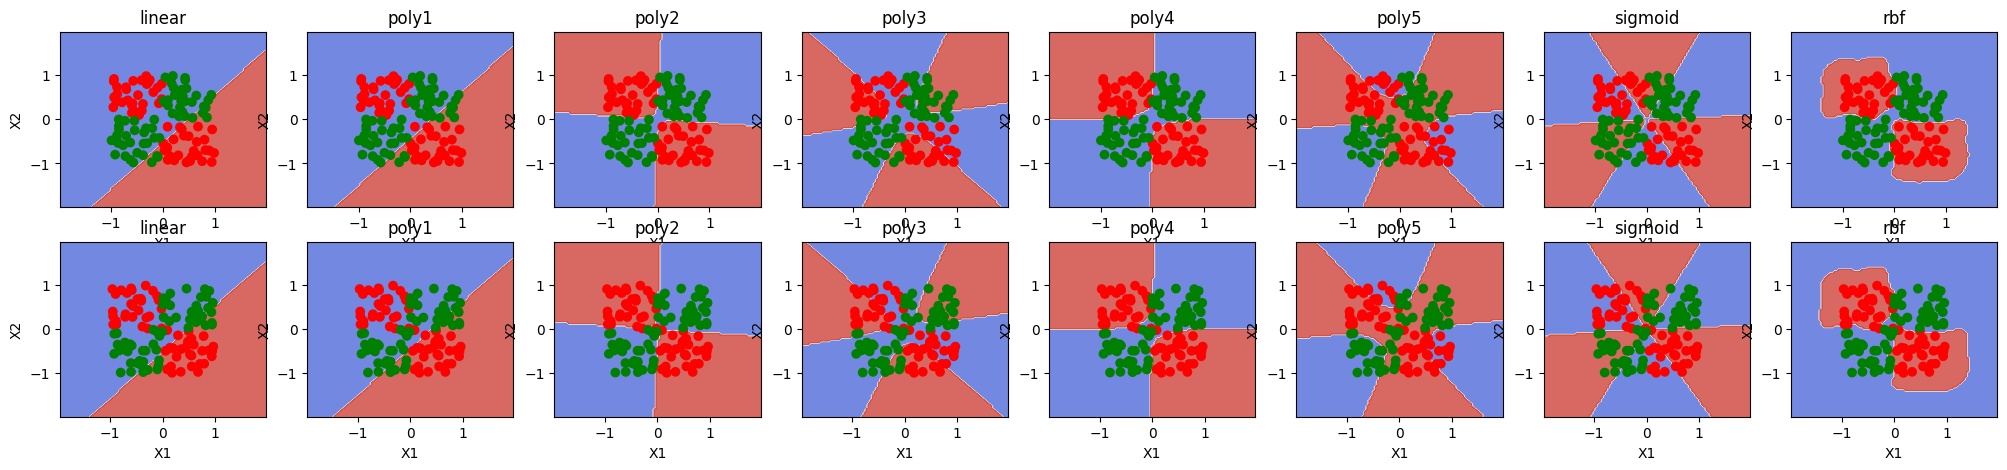

In [15]:
testSVC('data/svmdata_e.txt', 'data/svmdata_e_test.txt', 20)

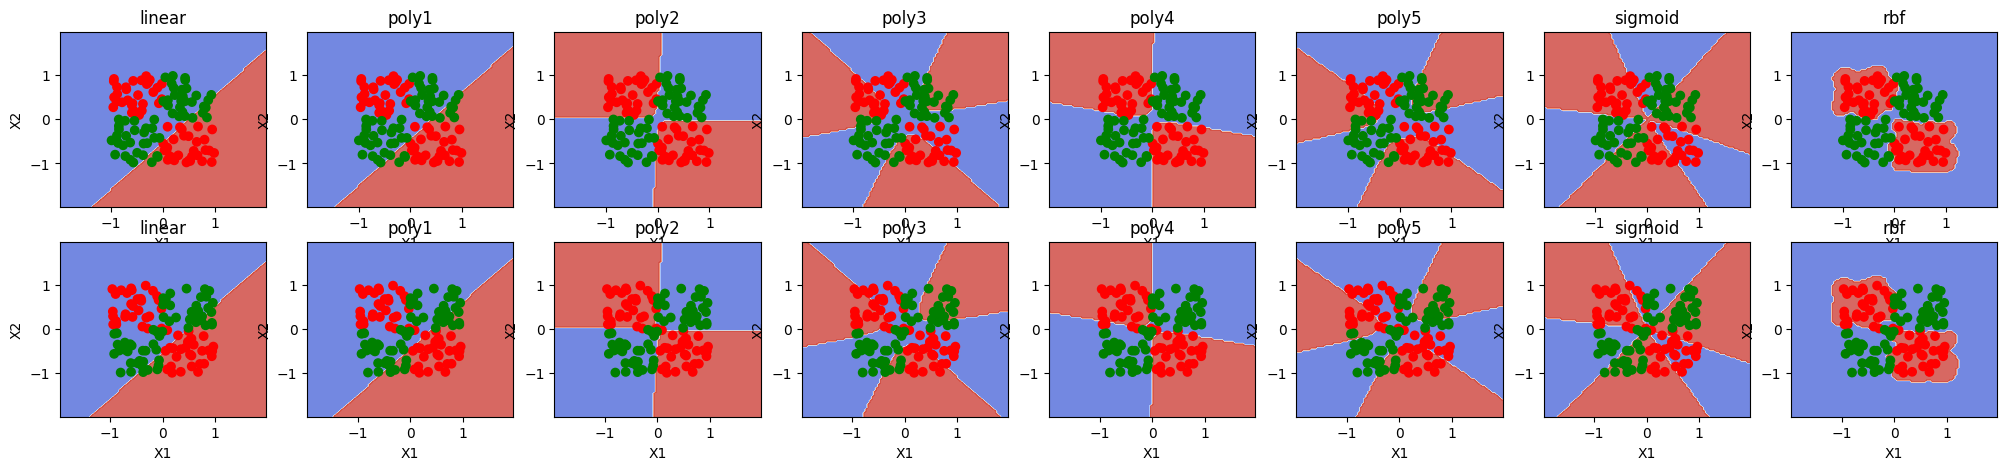

In [16]:
testSVC('data/svmdata_e.txt', 'data/svmdata_e_test.txt', 60)